/Users/tomascarrilho/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


{1: (0, 0), 2: (1, 1), 3: (2, 0), 4: (1, -1), 5: (3, 5), 6: (3, 1)}


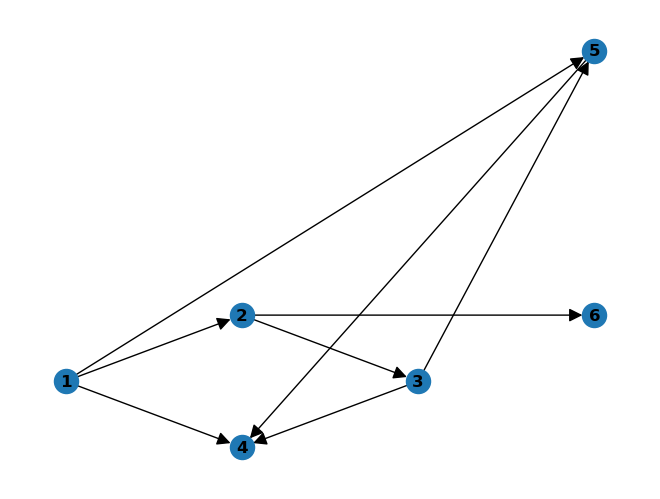

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
acyclic_graph = nx.DiGraph()
acyclic_graph.add_node(1, pos=(0, 0))
acyclic_graph.add_node(2, pos=(1, 1))
acyclic_graph.add_node(3, pos=(2, 0))
acyclic_graph.add_node(4, pos=(1, -1))
acyclic_graph.add_node(5, pos=(3, 5))
acyclic_graph.add_node(6, pos=(3, 1))

#acyclic_graph.add_edges_from([(1, 2), (1,4), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (4, 8), (5,9), (5,8), (8,6)])
acyclic_graph.add_edges_from([(1,2), (2,3), (3,4), (1,4), (3,5), (5,4), (1,5), (2,6)])
node_positions = nx.get_node_attributes(acyclic_graph, 'pos')
print(node_positions) 
acyclic_graph_dict = {node: list(acyclic_graph.successors(node)) for node in acyclic_graph.nodes}
# Visualize the acyclic graph (optional)
nx.draw(acyclic_graph, node_positions , with_labels=True, font_weight='bold', arrowsize=20)  
plt.show()

In [2]:
def topological_sort(graph):
    # Helper function for recursive depth-first search
    def dfs(node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor)
        topological_order.insert(0, node)

    visited = set()
    topological_order = []

    # Perform depth-first search for each unvisited node
    for node in graph:
        if node not in visited:
            dfs(node)

    return topological_order

def layer_assignment(acyclic_graph):
#The layer of a node is determined by considering the maximum layer of its incoming neighbors and incrementing it.
    topological_order = topological_sort(acyclic_graph)
    layers = {node: 0 for node in acyclic_graph}  # Initialize all nodes to Layer 0
    
    for node in topological_order:
        in_neighbors = [neighbor for neighbor, successors in acyclic_graph.items() if node in successors]
        layer = max([layers[neighbor] for neighbor in in_neighbors], default=-1) + 1
        layers[node] = layer

    return layers

def y_coordinate_assignment(layers):
#assigns y-coordinates to nodes based on their layers. It sorts the nodes by layer and assigns y-coordinates in increasing order.
    sorted_nodes = sorted(layers.keys(), key=lambda node: layers[node])
    y_coordinates = {node: layer for layer, node in enumerate(sorted_nodes)}
    return y_coordinates


In [3]:
##Layer assignment functions
import pydot


def get_data(dot_file_path):
    '''Returns the nodes, edges (both in pydot format), a list with all the nodes and another with all the edges, and also a dic with (edge):weigth
    '''
     #= 'Datasets/LesMiserables.dot'
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()
    graph = pydot.graph_from_dot_data(dot_data)

    nodes = graph[0].get_nodes()
    edges = graph[0].get_edges()
    
    node_list = [node.get_name() for node in nodes]
    edge_list = [(edge.get_source(), edge.get_destination()) for edge in edges]
    weights = {}
    if edges[0].get_attributes()!={}:
        name= str(list(edges[0].get_attributes().keys())[0])
       
    return nodes,edges,node_list,edge_list


def get_incoming_edges(node, edges):
    incoming = []
    for edge in edges:
        if edge.get_destination() == node:
            incoming.append(node)
    return incoming


def height_optimization(file_name):
    layers = []  # List to store layers
    nodes = [node.get_name() for node in  get_data(file_name)[0]]
    edges = get_data(file_name)[1]
    while edges:

        sources = [node for node in nodes if not list(get_incoming_edges(node, edges))]
        layers.append(sources)
        nodes = [node for node in nodes if node not in sources]
        edges = [edge for edge in edges if edge.get_source() not in sources]
        
    sources = [node for node in nodes if not list(get_incoming_edges(node, edges))]
    layers.append(sources)
    return layers

def y_coordinate_assignment_with_height_optimization(graph):
    height_optimization_layers = height_optimization(graph)
    y_coordinates = {}
    # Assign y-coordinates based on the height optimization layers
    for layer_index, layer in enumerate(height_optimization_layers):
        for node in layer:
            y_coordinates[node] = layer_index

    return y_coordinates, height_optimization_layers


y_coordinates_with_height_optimization, layers = y_coordinate_assignment_with_height_optimization("heuristic_acyc.dot")

print(layers)
#print(y_coordinates_with_height_optimization)

[['2', '7', '12'], ['4', '5', '11'], ['3', '6', '9', '10'], ['1', '8']]


In [4]:

# layers = layer_assignment(acyclic_graph_dict)

# # # Perform y-coordinate assignment based on layers
# # #y_coordinates = y_coordinate_assignment(layers)

# # #Perform y-coordinate assignment based on height optimization
# y_coordinates_with_height_optimization = y_coordinate_assignment_with_height_optimization(acyclic_graph)
# for node, y_coordinate in sorted(y_coordinates_with_height_optimization.items()):
#     node_positions[node] = (node_positions[node][0],y_coordinate)
#     print(node_positions[node][0],y_coordinate)
    
# print(node_positions)



# nx.draw(acyclic_graph,node_positions ,with_labels=True, font_weight='bold', arrowsize=20)  
# plt.show()

# #Print the layer assignment and y-coordinate assignment
# # for node, layer in layers.items():
# #     print(f"Node {node}: Layer {layer}, y-coordinate = {y_coordinates[node]}")

# for node, y_coordinate in sorted(y_coordinates_with_height_optimization.items()):
#    print(f"Node {node}: y-coordinate = {y_coordinate}")

In [5]:

import networkx as nx
import matplotlib.pyplot as plt


def calculate_crossings(graph):
    crossings = 0
    for u, v in graph.edges():
        for w, x in graph.edges():
            if u != w and u != x and v != w and v != x:
                if (u < w < v < x) or (w < u < x < v):
                    crossings += 1
    return crossings // 2



In [8]:
#Example layer assignment

def get_edges(edges, node):
    edge_list = []
    for edge in edges:
        source = edge.get_source() 
        dest = edge.get_destination()
        if source == node:
            edge_list.append(dest)
    return edge_list


_, layers = y_coordinate_assignment_with_height_optimization("heuristic_acyc.dot")
edges = get_data("heuristic_acyc.dot")[1]
#layers = tomas_layer_assignment("heuristic_acyc.dot")
#print(layers)

layers_dict = {}
for i,item in enumerate(layers):
    layers_dict[i] = item

for layer in layers_dict:
    for node in layers_dict[layer]:
        edge_list = get_edges(edges, node)
        for dest in edge_list:
            step = 1
            while dest not in layers_dict[layer + step] :
                layers[layer+step].append(f'd_{node,dest}')
                step += 1


                

#print(layers)
#print(layer_crossing_edges)
#nx.draw(graph ,with_labels=True, font_weight='bold', arrowsize=20)
# plt.grid('on')
# plt.show()


[['2', '7', '12'], ['4', '5', '11'], ['3', '6', '9', '10'], ['1', '8']]


In [7]:
# #TRASH

# prev_crossings = calculate_crossings(acyclic_graph)
# print(layers)
# print(y_coordinates_with_height_optimization)
# #print(prev_crossings)
# for _ in range(10): 
#     #median_positions = median_heuristic(acyclic_graph, node_positions)
#     barycenter_positions = barycenter_heuristic(acyclic_graph, node_positions)
#     crossings = calculate_crossings(acyclic_graph)
#     # if crossings >= prev_crossings:
#     #     break  
#     prev_crossings = crossings
#     print(crossings)
#     #print(barycenter_positions)
    

#     test = dict(sorted(barycenter_positions.items(), reverse=True))
#     print(test)    
#     nx.draw(acyclic_graph,test ,with_labels=True, font_weight='bold', arrowsize=20, font_color="red")
#     plt.show()



    # for key in layers_new:
    #     for value in layers_new[key]:
    #         print(lay[key])
    #         source = lay[key][0][0]
    #         dest = lay[key][0][1]
    #         source_layer = key
    #         print(source)
    #         print(dest)
    #         print(source_layer)

    # for key in lay:
    #     for v in key:
    #         source = key[v][0]
    #         dest = key[v][1]
    #         node = pydot.Node()
    #         acyclic_graph.add_node(node)
    #         node_positions[node] = ((node_positions[source][0] + node_positions[dest][0])/2, int(v)+1)
    #         acyclic_graph.add_edges_from([(source, node), (node, dest)])


# def layer_crossing(acyclic_graph, node_positions, layers):
#     layers_new = {}
#     for i,item in enumerate(layers):
#         layers_new[i] = item
        
#     layer_crossing_edges = {}
#     lay = []
#     for key in layers_new:
#         for value in layers_new[key]:
#             edges = get_edges(acyclic_graph, value)
#             for dest in edges:
#                 i = 1
#                 while dest not in layers_new[key+i]:
#                     lay.append({i: (value, dest)})
#                     layer_crossing_edges[i] = (value, dest)
#                     i = i+1
                    #print(layer_crossing_edges[key])
                
#     print(layer_crossing_edges)
#     print(lay)
#     print(node_positions)
#     for n_layers in layer_crossing_edges:
#         for i in range(n_layers):
#             source = layer_crossing_edges[n_layers][0]
#             dest =  layer_crossing_edges[n_layers][1]
#             print(f'adding {source} - {dest} in pos {((node_positions[source][0] + node_positions[dest][0])/(n_layers+1)+i/n_layers, node_positions[source][1]+int(i)+1)}')
#             node = pydot.Node()
#             acyclic_graph.add_node(node)
            
#             new_x = (node_positions[source][0] + node_positions[dest][0])/(n_layers+1)+i/n_layers #Divide the nodes accross the x distance
#             new_y = node_positions[source][1]+int(i)+1 #increment y for each layer

#             if (new_x, new_y) in node_positions:
#                 print("already exists")
#             node_positions[node] = (new_x, new_y)
#             #acyclic_graph.add_edges_from([(source, node), (node, dest)])
            
            

# layer_crossing(acyclic_graph, node_positions, layers)


# for node, y_coordinate in sorted(y_coordinates_with_height_optimization.items()):
#     node_positions[node] = (node_positions[node][0],y_coordinate)


